In [1]:
!nvidia-smi

Sun Jun  2 08:09:13 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.129.03             Driver Version: 535.129.03   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [44]:
!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.27 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5643.7/8062.4 GB disk)


In [8]:

from ultralytics import YOLO

from IPython.display import display, Image

import requests
url = 'https://media.roboflow.com/notebooks/examples/dog.jpeg'

response = requests.get(url)


with open('dog.jpeg', 'wb') as file:
    file.write(response.content)
     

[Errno 2] No such file or directory: '{HOME}'
/kaggle/working


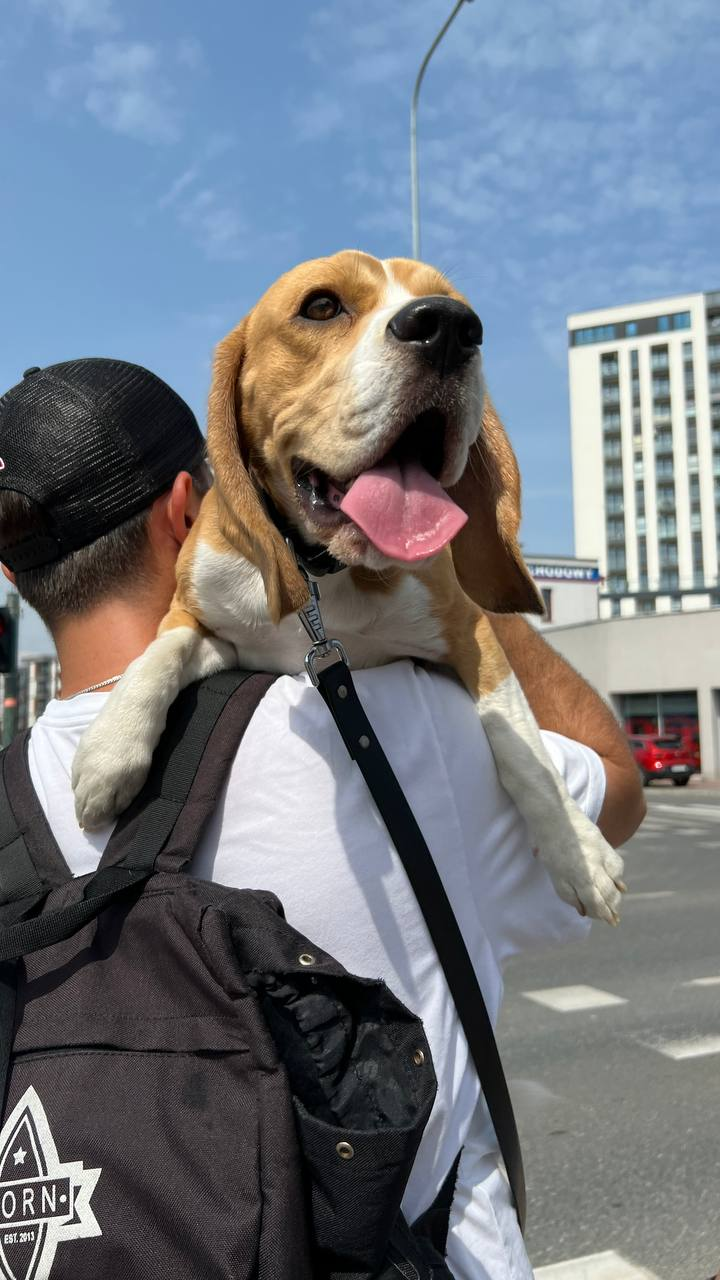

In [9]:
from IPython.display import Image

%cd {HOME}

Image(filename='dog.jpeg', height=600)

In [ ]:
import os
import subprocess
from IPython.display import FileLink, display
def download_file(path, download_file_name):
    os.chdir('/kaggle/working/')
    zip_name = f"/kaggle/working/{download_file_name}.zip"
    command = f"zip {zip_name} {path} -r"
    result = subprocess.run(command, shell=True, capture_output=True, text=True)
    if result.returncode != 0:
        print("Unable to run zip command!")
        print(result.stderr)
        return
    display(FileLink(f'{download_file_name}.zip'))

In [33]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="MiieRxiTSvgQGlurtwLB")
project = rf.workspace("alexzaneratto").project("football-player-detect-zjoxy")
version = project.version(5)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.5/75.5 kB 1.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 3.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 30.6 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully uninstalled cycler-0.12.1
  Attempting uninstall: certifi
    Found existing install


Extracting Dataset Version Zip to football-player-detect-5 in yolov8:: 100%|██████████| 8244/8244 [00:02<00:00, 3315.71it/s]


In [34]:
data_yaml_content = """
names:
- ball
- goalkeeper
- player
- referee
nc: 4
roboflow:
  license: CC BY 4.0
  project: football-players-detection-3zvbc
  url: https://universe.roboflow.com/roboflow-jvuqo/football-players-detection-3zvbc/dataset/2
  version: 2
  workspace: roboflow-jvuqo
test: /kaggle/working/football-player-detect-5/test/images
train: /kaggle/working/football-player-detect-5/train/images
val: /kaggle/working/football-player-detect-5/valid/images
"""

with open('/kaggle/working/football-player-detect-5/data.yaml', 'w') as file:
    file.write(data_yaml_content)

In [49]:
import os
os.environ['WANDB_MODE'] = 'dryrun'

!yolo task=detect mode=train epochs=500 batch=16 plots=True patience=50   \
model=yolov8m-p2.yaml \
data=/kaggle/working/football-player-detect-5/data.yaml

Ultralytics YOLOv8.2.27 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m-p2.yaml, data=/kaggle/working/football-player-detect-5/data.yaml, epochs=500, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=Tru

[Errno 2] No such file or directory: '{HOME}'
/kaggle/working


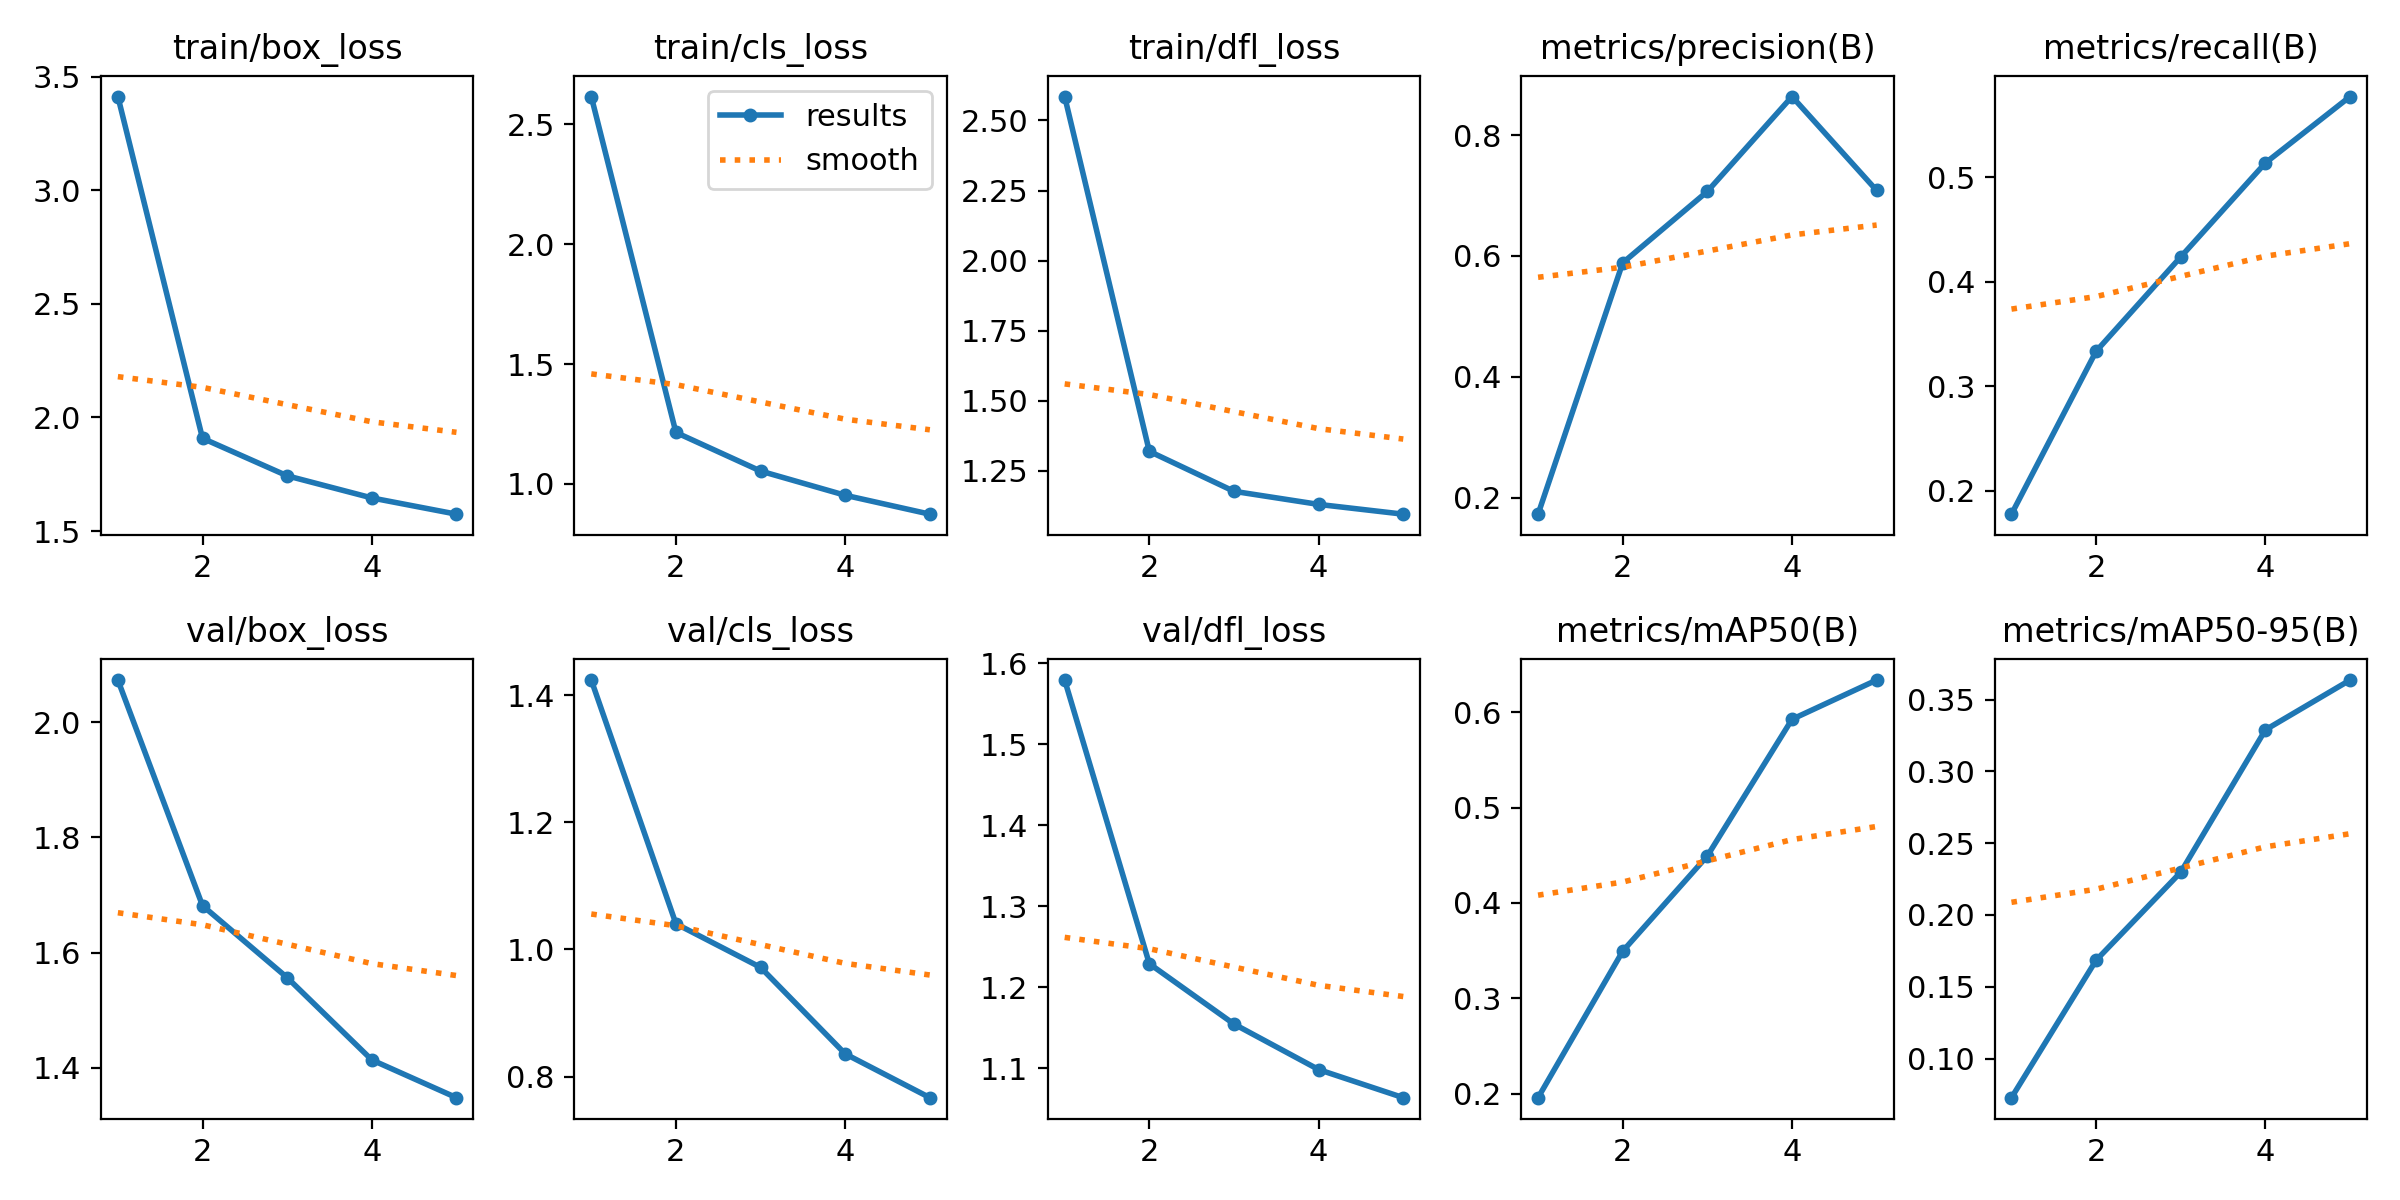

In [51]:
%cd {HOME}
Image(filename=f'/kaggle/working/runs/detect/train2/results.png', width=600)

In [ ]:
download_file('/kaggle/working/runs/detect/train/', 'out_1')


0: 384x640 1 goalkeeper, 22 players, 26.9ms
1: 384x640 22 players, 1 referee, 26.9ms
2: 384x640 1 ball, 1 goalkeeper, 19 players, 1 referee, 26.9ms
Speed: 2.0ms preprocess, 26.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


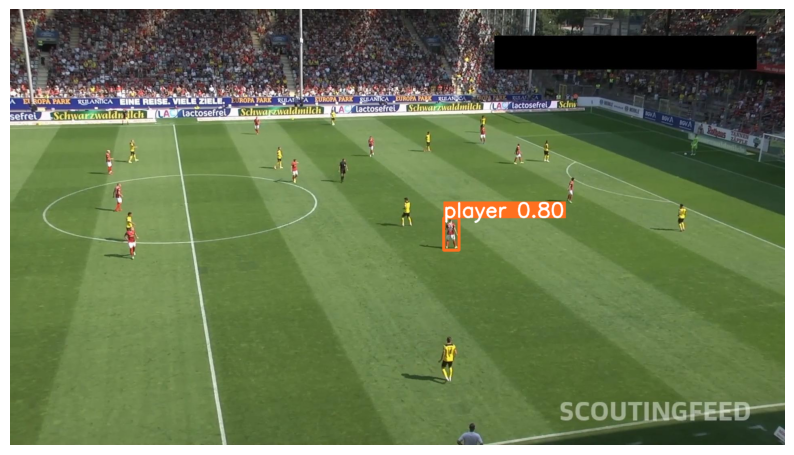

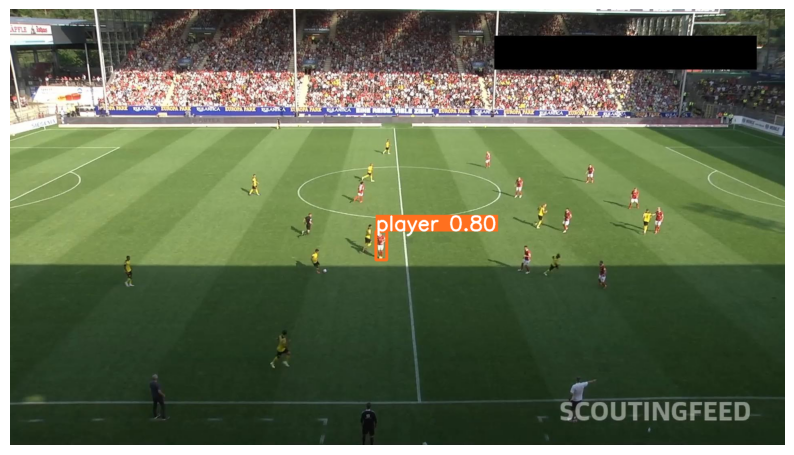

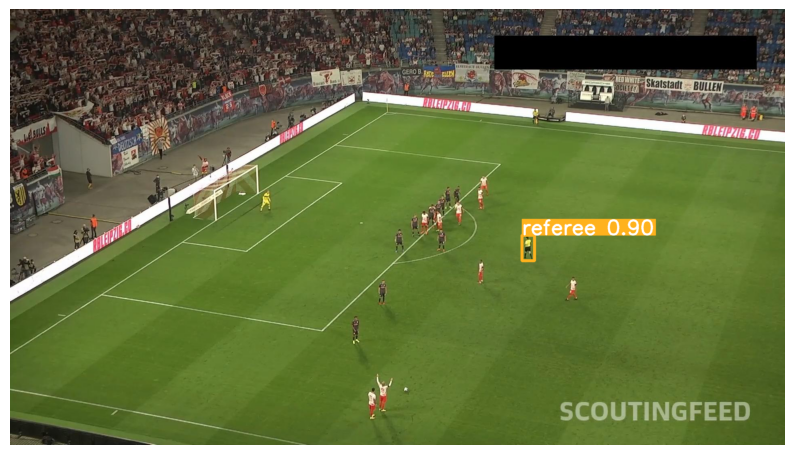

In [47]:
import cv2
path_to_model = 'runs/detect/train/weights/best.pt'
model = YOLO(path_to_model)

results = model(['/kaggle/working/football-player-detect-5/test/images/Video5_mp4-81_jpg.rf.3802746431315a60314a4203fe9ba9ad.jpg', '/kaggle/working/football-player-detect-5/test/images/Video6_mp4-460_jpg.rf.16628f31bf4fbcfda524c2c6d9024cac.jpg','/kaggle/working/football-player-detect-5/test/images/Video4_mp4-78_jpg.rf.9ba7e6b92d73c469e1ed7425acf3705d.jpg'])

for result in results:

    result_image = result[0].plot()  

    result_image_rgb = cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB)

    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 10))
    plt.imshow(result_image_rgb)
    plt.axis('off')  
    plt.show()

Ultralytics YOLOv8.2.27 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=runs/detect/train2/weights/last.pt, data=/kaggle/working/football-player-detect-5/data.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=Fals